## Time Series forecasting using Auto ARIMA

- In an ARIMA model there are 3 parameters that are used to help model the major aspects of a times series: seasonality, trend, and noise. These parameters are labeled p,d,and q.

- p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values. For example, forecasting that if it rained a lot over the past few days, you state its likely that it will rain tomorrow as well.

- d is the parameter associated with the integrated part of the model, which effects the amount of differencing to apply to a time series. You can imagine an example of this as forecasting that the amount of rain tomorrow will be similar to the amount of rain today, if the daily amounts of rain have been similar over the past few days.

- q is the parameter associated with the moving average part of the model.

### Here I Show Smart Method To find (p,d,q) Value
<img src="13.png">

In [1]:
import pandas as pd
import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA 
from sklearn.metrics import mean_squared_error

import warnings
warnings.simplefilter('ignore')

In [2]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [3]:
series = pd.read_csv('shampoo Sale.csv', header=0, parse_dates=[0],index_col=0)

In [4]:
series.dropna(inplace=True)

In [5]:
series.columns = ['sale']

In [6]:
series.head()

,sale
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


<AxesSubplot:xlabel='Month'>

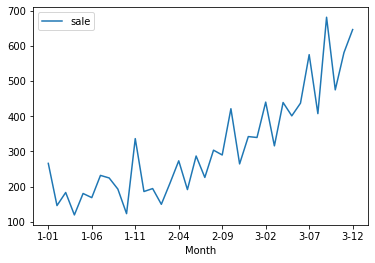

In [7]:
series.plot()

In [8]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [9]:
adfuller_test(series['sale'])

ADF Test Statistic : 3.0601420836411775
p-value : 1.0
#Lags Used : 10
Number of Observations Used : 25
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [10]:
series['Sales First Difference'] =series['sale'] - series['sale'].shift(1)

In [11]:
series.dropna(inplace=True)
adfuller_test(series['Sales First Difference'])

ADF Test Statistic : -7.249074055553857
p-value : 1.7998574141686703e-10
#Lags Used : 1
Number of Observations Used : 33
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

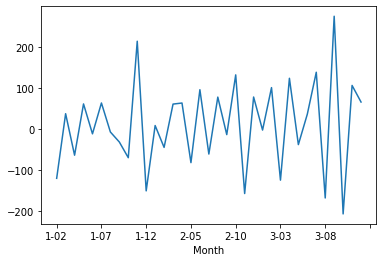

In [12]:
series['Sales First Difference'].plot()

## Find p,d,q

In [13]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [51]:
stepwise_fit = auto_arima(series['Sales First Difference'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   35
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -195.764
Date:                Sat, 20 Feb 2021   AIC                            401.528
Time:                        20:23:40   BIC                            409.305
Sample:                             0   HQIC                           404.213
                                 - 35                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.2843      6.161      1.507      0.132      -2.791      21.360
ar.L1          0.0991      0.310      0.320      0.749      -0.508       0.706
ma.L1         -1.4076      0.454     -3.098      0.002      -2.298      -0.517
ma.L2          0.9627      0.652      1.478      0.140      -0.314       2.240
sigma2      3649.4202   2009.607      1.816      0.069    -289.337    7588.177
===================================================================================
Ljung-Box (Q):                       33.09   Jarque-Bera (JB):                 0.86
Prob(Q):                              0.51   Prob(JB):                         0.65
Heteroskedasticity (H):               0.95   Skew:                             0.31
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
from statsmodels.tsa.arima_model import ARIMA

In [16]:
series_drop = series.drop('sale',axis=1)

In [17]:
print(series_drop.shape)

(35, 1)


In [18]:
print(series_drop.shape)
train=series_drop.iloc[-30:]
test=series_drop.iloc[:-30]
print(train.shape,test.shape)
# print(test.iloc[0],test.iloc[-1])

(35, 1)
(30, 1) (5, 1)


In [46]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Sales First Difference'],order=(1,0,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARMA Model Results                                
==================================================================================
Dep. Variable:     Sales First Difference   No. Observations:                   30
Model:                         ARMA(1, 3)   Log Likelihood                -165.536
Method:                           css-mle   S.D. of innovations             53.560
Date:                    Sat, 20 Feb 2021   AIC                            343.071
Time:                            20:23:23   BIC                            351.478
Sample:                                 0   HQIC                           345.761
                                                                                  
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           13.3216      5.857      2.275      0.023       1.843      24.800
ar.L1.Sales First Difference    -0.8862      0.098     -9.020      0.000      -1.079      -0.694
ma.L1.Sales First Difference    -0.4163      0.148     -2.805      0.005      -0.707      -0.125
ma.L2.Sales First Difference    -0.4163      0.130     -3.199      0.001      -0.671      -0.161
ma.L3.Sales First Difference     1.0000      0.174      5.734      0.000       0.658       1.342
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1284           +0.0000j            1.1284            0.5000
MA.1           -1.0000           -0.0000j            1.0000           -0.5000
MA.2            0.7081           -0.7061j            1.0000           -0.1248
MA.3            0.7081           +0.7061j            1.0000            0.1248
-----------------------------------------------------------------------------
"""

In [47]:
test

,Sales First Difference
Month,
1-02,-120.1
1-03,37.2
1-04,-63.8
1-05,61.0
1-06,-11.8


In [48]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')

<AxesSubplot:xlabel='Month'>

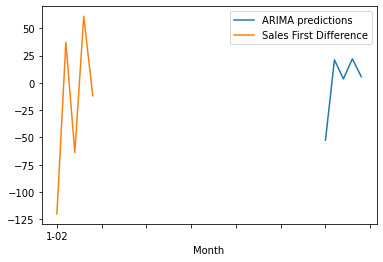

In [49]:
pred.plot(legend='ARIMA Predictions')
test['Sales First Difference'].plot(legend=True)

In [50]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Sales First Difference']))
print(rmse)

47.332833784693406
